# Image feature computation tutorial

> Utilities for computing image features.

## HOG

Histogram of oriented gradients

[Link](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html)

(-0.5, 63.5, 63.5, -0.5)

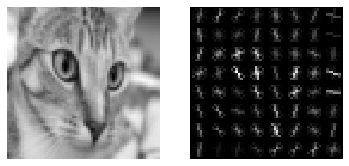

In [ ]:
from skimage.feature import hog
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.data import chelsea
from skimage.exposure import rescale_intensity
from matplotlib.pyplot import subplot, imshow, axis
import matplotlib.pyplot as plt

im = chelsea()

im = resize(rgb2gray(im), (64,64))

fd, hog_image = hog(im, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

subplot(1,2,1)
imshow(im, cmap=plt.cm.gray)
axis("off")

# Rescale histogram for better display
hog_image_rescaled = rescale_intensity(hog_image, in_range=(0, 10))
subplot(1,2,2)
imshow(hog_image_rescaled, cmap=plt.cm.gray)
axis("off")

TODO: Visualisation for all cell size

## Daisy

An another type daisy shipped with the skimage library

[Link](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_daisy.html)

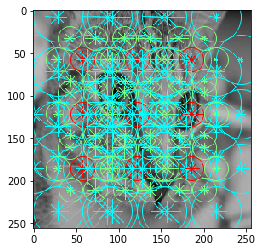

In [ ]:
from skimage.feature import daisy

im = resize(rgb2gray(loaded_im), (256,256))

descs, descs_img = daisy(im, step=64, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)


imshow(descs_img)

# Haar

Compute haar features as in the famous viola jones paper

[Link](https://scikit-image.org/docs/dev/auto_examples/applications/plot_haar_extraction_selection_classification.html#sphx-glr-auto-examples-applications-plot-haar-extraction-selection-classification-py)

In [ ]:
from skimage.feature import haar_like_feature_coord, haar_like_feature
from skimage.transform import integral_image

feature_types = ['type-2-x', 'type-2-y',
                 'type-3-x', 'type-3-y',
                 'type-4']

im = resize(rgb2gray(loaded_im), (32, 32))

img_ii = integral_image(im)

# Extract all possible features
feature_coord, feature_type = haar_like_feature_coord(width=im.shape[0], height=im.shape[1],
                            feature_type=feature_types)

print(f"Number of haar feature : {feature_coord.shape[0]}")

# Limiting feature for convenience reasons
# This example should run fast :smile:
feature_coord = feature_coord[:256]
feature_type = feature_type[:256]

feats = haar_like_feature(img_ii, 0, 0, img_ii.shape[0], img_ii.shape[1], feature_type=feature_type, feature_coord=feature_coord)

print(f"Extracted features: {feats.shape}")

Number of haar feature : 509270
Extracted features: (256,)


## LBP

[Link](https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html)

(-0.5, 31.5, 31.5, -0.5)

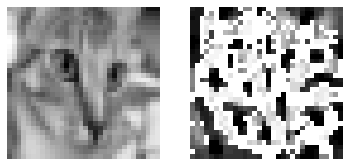

In [ ]:
from skimage.feature import local_binary_pattern

# settings for LBP
radius = 3
n_points = 8 * radius

image = resize(rgb2gray(loaded_im), (32, 32))
lbp = local_binary_pattern(image, n_points, radius, "uniform")

subplot(1,2,1)
imshow(image, cmap=plt.cm.gray)
axis("off")
subplot(1,2,2)
imshow(lbp, cmap=plt.cm.gray)
axis("off")

## Haralick features

## Convolutions (Random kernels)

(-0.5, 255.5, 255.5, -0.5)

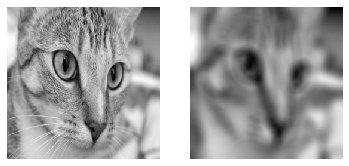

In [ ]:
import cv2
from skimage.morphology import disk
gray = resize(rgb2gray(loaded_im), (256, 256))

kernel = disk(10)

out = cv2.filter2D(gray, -1, kernel)

subplot(1,2,1)
imshow(gray, cmap=plt.cm.gray)
axis("off")
subplot(1,2,2)
imshow(out, cmap=plt.cm.gray)
axis("off")

(-0.5, 255.5, 255.5, -0.5)

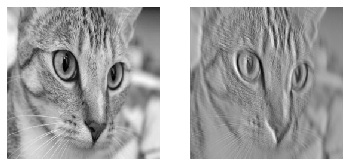

In [ ]:
import numpy as np

kernel = 0.2* np.random.randn(10,10)

out = cv2.filter2D(gray, -1, kernel)

subplot(1,2,1)
imshow(gray, cmap=plt.cm.gray)
axis("off")
subplot(1,2,2)
imshow(out, cmap=plt.cm.gray)
axis("off")

## Convolutions (Gabor kernels)

(-0.5, 255.5, 255.5, -0.5)

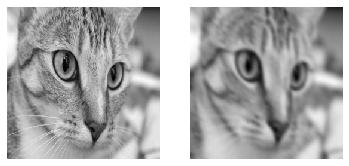

In [ ]:
import numpy as np
from skimage.filters import gabor_kernel


theta = np.random.choice(
    np.arange(0, 4)/ 4. * np.pi
)

sigma = np.random.choice(
    np.arange(0,4)
) 

freq = np.random.choice(
    np.arange(0.05,0.25, 0.05)
) 
    
        
kernel = np.real(gabor_kernel(freq, theta=theta,
                              sigma_x=sigma, sigma_y=sigma))

out = cv2.filter2D(gray, -1, kernel)

subplot(1,2,1)
imshow(gray, cmap=plt.cm.gray)
axis("off")
subplot(1,2,2)
imshow(out, cmap=plt.cm.gray)
axis("off")